## Inference Engines

1. Non-Markovian methods:
       <ul>
       <li> Grid computing</li>
       </ul>

The following code implements the grid approach to solve the coin-flipping 
problem we began to explore in Chapter 1, Thinking Probabilistically -   Bayesian
Inference Primer:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    """
    A grid implementation for the coin-flip problem
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid, posterior

Assuming we made 4 tosses and we observe only 1 head we have the following:

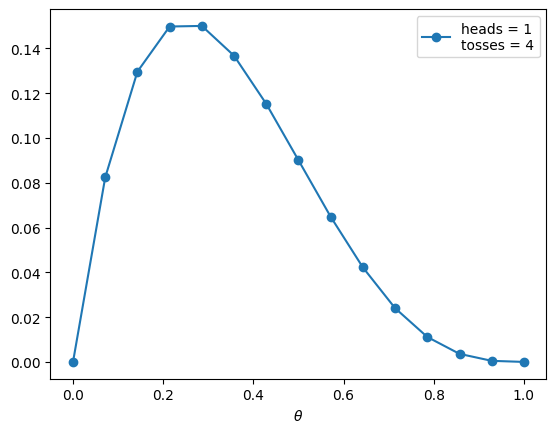

In [3]:
points = 15
h, n = 1, 4
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

**Simple Monte carlo simulation to compute pi**

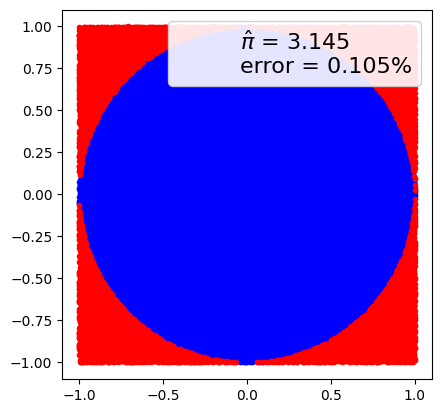

In [11]:
 N = 80000
 x, y = np.random.uniform(-1, 1, size=(2, N))
 inside = (x**2 + y**2)<=1
 pi = inside.sum()*4/N
 error = abs((pi-np.pi)/pi)* 100
 outside = np.invert(inside)
 plt.plot(x[inside], y[inside], 'b.')
 plt.plot(x[outside], y[outside], 'r.')
 plt.plot(0, 0, label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.
 format(pi, error), alpha=0)
 plt.axis('square')
 plt.legend(frameon=True, framealpha=0.9, fontsize=16);

# MCMC Methods
## Metropolis Hasting
The first argument of the metropolis function is a SciPy distribution

In [12]:
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob/old_prob
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    return samples

In [32]:
def normalize_list(input_list):
    # Find the minimum and maximum values in the list
    min_val = min(input_list)
    max_val = max(input_list)
    
    # Normalize each element in the list
    normalized_list = [(x - min_val) / (max_val - min_val) for x in input_list]
    
    return normalized_list

We have defined func as a beta function. We are plotting the samples 
obtained by metropolis as a histogram and also the True distribution as a  
red line

(0.0, 1.0)

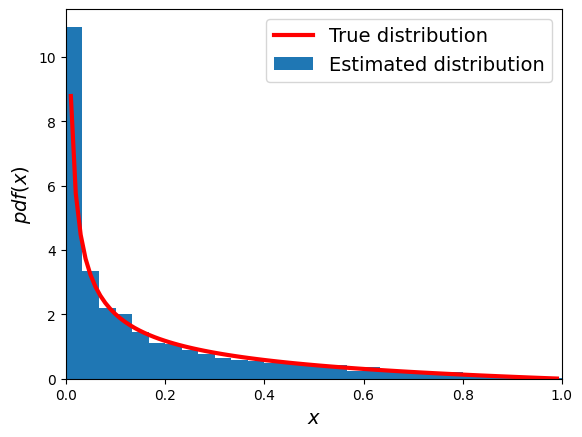

In [36]:
func = stats.beta(0.4, 2)
samples = metropolis(func)
normalized_samples = normalize_list(samples)
x = np.linspace(0.01, 0.99, 100)
y = func.pdf(x)
plt.plot(x, func.pdf(x), 'r-', lw=3, label='True distribution')
plt.hist(normalized_samples, bins=30, density=True, label='Estimated distribution')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0,1)